In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, graph):
        super().__init__()
        self.conv1 = GCNConv(graph.num_node_features, 16)
        self.conv2 = GCNConv(16, 16)

        self.fc_p1 = nn.Linear(16, 16)
        self.fc_p2 = nn.Linear(16, graph.num_nodes)

        self.fc_v1 = nn.Linear(16, 16)
        self.fc_v2 = nn.Linear(16, 1)

        features_layers = []  # [self.conv1, self.conv2]
        for layer in features_layers:
            torch.nn.init.xavier_normal_(layer.weight)
            torch.nn.init.zeros_(layer.bias)

        output_layers = [self.fc_p1, self.fc_p2, self.fc_v1, self.fc_v2]
        for layer in output_layers:
            torch.nn.init.xavier_normal_(layer.weight)
            torch.nn.init.zeros_(layer.bias)


    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        x = F.relu(self.fc_p1(x))
        X = self.fc_p2(x)

        v = F.relu(self.fc_v1(x))
        V = self.fc_v2(v)

        return X, V

In [86]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
None < 0

In [2]:
import torch
import torch.nn as nn
import datetime
import torch.nn.functional as F
from ppo_parallel import Agent
import torch.nn.init as init
import numpy as np
import signal
from env import Env
import graph_utils

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device: ', device)
start_date = datetime.datetime.now()
graph = graph_utils.load_graph('data/1')

env = Env(graph, device)

net = GCN(graph)
# net = torch.load('models/p_med_last.pt')

agent = Agent(net, 'Adam', device=device, name='ppo', path='results')

agent.train([graph, device], Env, graph.num_nodes)

# torch.save(net, 'models/save.net')


device:  cuda
optimizer: Adam
Training is starting


: 

In [84]:
%autoreload 2
from graph_store import GraphStore

store = GraphStore((2, 3, 2))

store[0, :, :] = [1, 2]

store

ValueError: attempt to assign sequence of size 2 to extended slice of size 3

In [74]:
len(range(*slice(None, None, None).indices(10)))

10

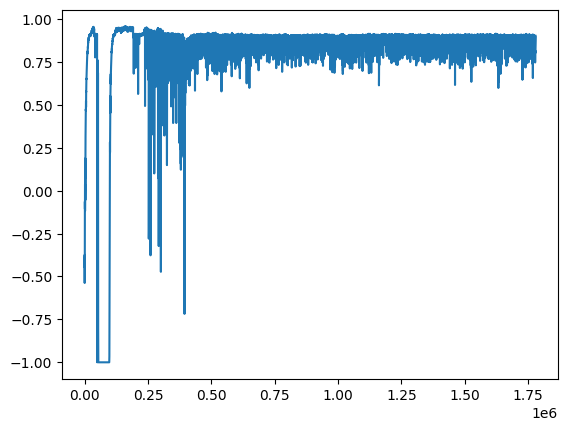

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('results/data/ppo_1.txt')
plt.plot(df['episode'], df['avg_score'])